In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Tit Coq,1953
1,Grand Old Girl,1935
2,Nemmeno in un sogno,2002
3,Beneath the Skin: Untold Story,2003
4,Sillik,1979


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

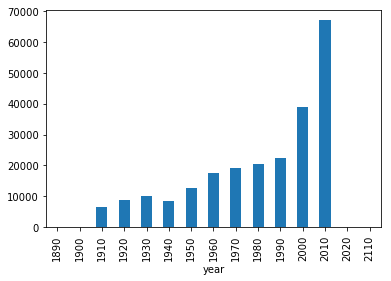

In [60]:
t = titles
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

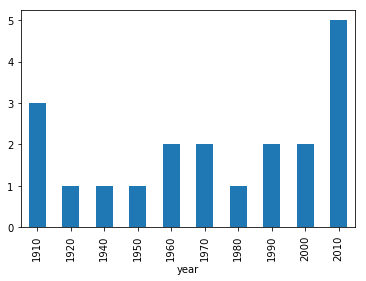

In [61]:
t = titles
t = t[t.title == 'Hamlet']
t.groupby(t.year // 10 * 10).size().plot(kind='bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [63]:
c = cast
c = c[(c.n == 1) & (c.year // 10 == 195)]
c.groupby(['year', 'type']).size()

year  type   
1950  actor      626
      actress    286
1951  actor      652
      actress    284
1952  actor      611
      actress    299
1953  actor      654
      actress    305
1954  actor      643
      actress    310
1955  actor      648
      actress    285
1956  actor      651
      actress    307
1957  actor      739
      actress    307
1958  actor      712
      actress    294
1959  actor      731
      actress    322
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [71]:
c = cast
c = c[(c.n < 6) & (c.year // 10 * 10 == 1950)]
c.groupby(['n', 'type']).size()

n    type   
1.0  actor      6667
     actress    2999
2.0  actor      4602
     actress    4594
3.0  actor      5626
     actress    3181
4.0  actor      5637
     actress    2862
5.0  actor      5656
     actress    2561
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [87]:
c = cast
c = c[c.title == 'The Pink Panther']
c.sort_values(by='n').groupby(['year']).size()

year
1963    21
2006    90
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [108]:
c = cast
c = c.set_index(['name']).sort_index()
c = c.loc['Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g>1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [110]:
c =cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g>=2]

character
Animal            6
Bert              3
Cookie Monster    4
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64

In [9]:
%%time
cast[cast.title == 'Sleuth']

Wall time: 1.07 s


,title,year,name,type,character,n
256063,Sleuth,2007,Kenneth Branagh,actor,Other Man on T.V.,NaN
321799,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
321800,Sleuth,2007,Michael Caine,actor,Andrew,1.0
368381,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
368382,Sleuth,2007,Alec (II) Cawthorne,actor,Inspector Doppler,NaN
1273996,Sleuth,2007,Jude Law,actor,Milo,2.0
1426933,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
1443428,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
1679805,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
1778743,Sleuth,2007,Harold Pinter,actor,Man on T.V.,3.0


In [29]:
c = cast.set_index(['title', 'year']).sort_index()
c.head()

name   type               character     n
title            year                                                        
#1 Serial Killer 2013      Michael Alton  actor       Detective Roberts  17.0
                 2013         Aaron Aoki  actor      Plastic Bag Victim  21.0
                 2013  Zachary (X) Brown  actor  Africian American Teen  18.0
                 2013     Yvis Cannavale  actor            Homeless Man  25.0
                 2013      Patrick Chien  actor          Cleaver Victim  22.0

In [34]:
%%time
#c.loc['Sleuth'].loc[1972]
c.loc[('Sleuth', 1972)]

Wall time: 259 ms


name     type                   character    n
title  year                                                              
Sleuth 1972       Michael Caine    actor                 Milo Tindle  2.0
       1972      Alec Cawthorne    actor           Inspector Doppler  3.0
       1972        Teddy Martin    actor      Police Constable Higgs  6.0
       1972  John (II) Matthews    actor  Detective Sergeant Tarrant  4.0
       1972    Laurence Olivier    actor                 Andrew Wyke  1.0
       1972  Eve (III) Channing  actress             Marguerite Wyke  5.0

In [38]:
c.loc[('Sleuth', 1972)].reset_index(['year', 'title'])

,title,year,name,type,character,n
0,Sleuth,1972,Michael Caine,actor,Milo Tindle,2.0
1,Sleuth,1972,Alec Cawthorne,actor,Inspector Doppler,3.0
2,Sleuth,1972,Teddy Martin,actor,Police Constable Higgs,6.0
3,Sleuth,1972,John (II) Matthews,actor,Detective Sergeant Tarrant,4.0
4,Sleuth,1972,Laurence Olivier,actor,Andrew Wyke,1.0
5,Sleuth,1972,Eve (III) Channing,actress,Marguerite Wyke,5.0


In [40]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['title', 'year', 'character']).size()

title                               year  character               
Batman & Robin                      1997  Batman                      1
                                          Bruce Wayne                 1
Burn After Reading                  2008  Harry Pfarrer               1
Confessions of a Dangerous Mind     2002  Jim Byrd                    1
Curdled                             1996  Seth Gecko                  1
Fantastic Mr. Fox                   2009  Mr. Fox                     1
From Dusk Till Dawn                 1996  Seth Gecko                  1
Good Night, and Good Luck.          2005  Fred Friendly               1
Gravity                             2013  Matt Kowalski               1
Grizzly II: The Concert             1983  Ron                         1
Hail, Caesar!                       2016  Baird Whitlock              1
Intolerable Cruelty                 2003  Miles                       1
Leatherheads                        2008  Dodge Connelly             

In [41]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(['title', 'year']).size()

title                               year
Batman & Robin                      1997    2
Burn After Reading                  2008    1
Confessions of a Dangerous Mind     2002    1
Curdled                             1996    1
Fantastic Mr. Fox                   2009    1
From Dusk Till Dawn                 1996    1
Good Night, and Good Luck.          2005    1
Gravity                             2013    1
Grizzly II: The Concert             1983    1
Hail, Caesar!                       2016    1
Intolerable Cruelty                 2003    1
Leatherheads                        2008    1
Michael Clayton                     2007    1
Money Monster                       2016    1
Morning Glory                       2010    1
O Brother, Where Art Thou?          2000    1
Ocean's Eleven                      2001    1
Ocean's Thirteen                    2007    1
Ocean's Twelve                      2004    1
One Fine Day                        1996    1
Out of Sight                        199

In [46]:
c = cast
c = c[c.name == 'George Clooney']
c.groupby(c.year // 10 * 10).n.size()

year
1980     3
1990    14
2000    20
2010    10
dtype: int64

In [83]:
cast[cast.title.str.startswith('Pink Panther')].title.head()

Series([], Name: title, dtype: object)